# Dataset: Marketing campaign dataset (customer spend, engagement, clicks) 
#### Calculate average spending per customer 
#### Identify the top 10% of spenders 
#### Detect skewness in customer engagement metrics 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Marketing_Campaign_Data.csv')

In [3]:
df

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Cost (₹),Revenue (₹),Region
0,2024-01-01,AD004,Hackathon,YouTube,17–21 Age,285708,16956,4087,2547,1148,"₹ 275,458","₹ 4,615,838",West India
1,2024-01-02,AD004,Hackathon,YouTube,17–21 Age,140449,10082,1815,951,565,"₹ 133,026","₹ 3,513,170",North India
2,2024-01-03,AD004,Hackathon,YouTube,17–21 Age,140958,7474,1169,683,343,"₹ 135,766","₹ 1,051,925",North India
3,2024-01-04,AD004,Hackathon,YouTube,22–27 Age,257823,16841,3179,1584,698,"₹ 229,715","₹ 3,850,640",West India
4,2024-01-05,AD004,Hackathon,YouTube,25–35 Age,98595,7293,1340,854,368,"₹ 52,361","₹ 1,543,263",West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2025-10-27,AD002,MBA Admission,Facebook,21–35 Age,277676,18342,3757,2032,1017,"₹ 242,232","₹ 5,399,981",South India
759,2025-10-28,AD002,MBA Admission,Facebook,21–35 Age,132019,9429,2004,1029,542,"₹ 129,504","₹ 3,403,497",West India
760,2025-10-29,AD002,MBA Admission,Facebook,21–35 Age,89527,5616,865,507,215,"₹ 79,012","₹ 1,224,216",West India
761,2025-10-30,AD002,MBA Admission,Facebook,21–35 Age,232419,17670,3031,1638,975,"₹ 200,506","₹ 7,007,981",East India


In [4]:
df.head()

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Cost (₹),Revenue (₹),Region
0,2024-01-01,AD004,Hackathon,YouTube,17–21 Age,285708,16956,4087,2547,1148,"₹ 275,458","₹ 4,615,838",West India
1,2024-01-02,AD004,Hackathon,YouTube,17–21 Age,140449,10082,1815,951,565,"₹ 133,026","₹ 3,513,170",North India
2,2024-01-03,AD004,Hackathon,YouTube,17–21 Age,140958,7474,1169,683,343,"₹ 135,766","₹ 1,051,925",North India
3,2024-01-04,AD004,Hackathon,YouTube,22–27 Age,257823,16841,3179,1584,698,"₹ 229,715","₹ 3,850,640",West India
4,2024-01-05,AD004,Hackathon,YouTube,25–35 Age,98595,7293,1340,854,368,"₹ 52,361","₹ 1,543,263",West India


In [5]:
df.tail()

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Cost (₹),Revenue (₹),Region
758,2025-10-27,AD002,MBA Admission,Facebook,21–35 Age,277676,18342,3757,2032,1017,"₹ 242,232","₹ 5,399,981",South India
759,2025-10-28,AD002,MBA Admission,Facebook,21–35 Age,132019,9429,2004,1029,542,"₹ 129,504","₹ 3,403,497",West India
760,2025-10-29,AD002,MBA Admission,Facebook,21–35 Age,89527,5616,865,507,215,"₹ 79,012","₹ 1,224,216",West India
761,2025-10-30,AD002,MBA Admission,Facebook,21–35 Age,232419,17670,3031,1638,975,"₹ 200,506","₹ 7,007,981",East India
762,2025-10-31,AD002,MBA Admission,Facebook,21–35 Age,267804,19472,4863,2431,1100,"₹ 251,059","₹ 6,675,312",Pan India


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            763 non-null    object
 1   CampaignID      763 non-null    object
 2   CampaignName    763 non-null    object
 3   Platform        763 non-null    object
 4   TargetAudience  763 non-null    object
 5   Impressions     763 non-null    int64 
 6   Clicks          763 non-null    int64 
 7   Leads           763 non-null    int64 
 8   Applications    763 non-null    int64 
 9   Enrollments     763 non-null    int64 
 10  Cost (₹)        763 non-null    object
 11  Revenue (₹)     763 non-null    object
 12  Region          763 non-null    object
dtypes: int64(5), object(8)
memory usage: 77.6+ KB


In [7]:
df.describe(include='all')

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Cost (₹),Revenue (₹),Region
count,763,763,763,763,763,763.000000,763.000000,763.000000,763.000000,763.000000,763,763,763
unique,670,5,5,5,4,NaN,NaN,NaN,NaN,NaN,761,763,5
top,2024-03-24,AD001,UG Admission,Google Ads,17–21 Age,NaN,NaN,NaN,NaN,NaN,"₹ 31,495","₹ 6,675,312",Pan India
freq,2,184,184,184,316,NaN,NaN,NaN,NaN,NaN,2,1,169
mean,NaN,NaN,NaN,NaN,NaN,169276.787680,9355.716907,1862.757536,1027.019659,514.173001,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,73046.934246,4949.433462,1007.799358,574.587368,294.810151,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,50267.000000,1674.000000,327.000000,159.000000,73.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,106156.000000,5448.000000,1085.500000,589.000000,291.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,166847.000000,8435.000000,1684.000000,909.000000,451.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,232192.500000,12587.500000,2496.000000,1365.000000,682.000000,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Date              0
CampaignID        0
CampaignName      0
Platform          0
TargetAudience    0
Impressions       0
Clicks            0
Leads             0
Applications      0
Enrollments       0
Cost (₹)          0
Revenue (₹)       0
Region            0
dtype: int64

# Data Cleaning and Exploration

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Cost (₹),Revenue (₹),Region
0,2024-01-01,AD004,Hackathon,YouTube,17–21 Age,285708,16956,4087,2547,1148,"₹ 275,458","₹ 4,615,838",West India
1,2024-01-02,AD004,Hackathon,YouTube,17–21 Age,140449,10082,1815,951,565,"₹ 133,026","₹ 3,513,170",North India
2,2024-01-03,AD004,Hackathon,YouTube,17–21 Age,140958,7474,1169,683,343,"₹ 135,766","₹ 1,051,925",North India
3,2024-01-04,AD004,Hackathon,YouTube,22–27 Age,257823,16841,3179,1584,698,"₹ 229,715","₹ 3,850,640",West India
4,2024-01-05,AD004,Hackathon,YouTube,25–35 Age,98595,7293,1340,854,368,"₹ 52,361","₹ 1,543,263",West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2025-10-27,AD002,MBA Admission,Facebook,21–35 Age,277676,18342,3757,2032,1017,"₹ 242,232","₹ 5,399,981",South India
759,2025-10-28,AD002,MBA Admission,Facebook,21–35 Age,132019,9429,2004,1029,542,"₹ 129,504","₹ 3,403,497",West India
760,2025-10-29,AD002,MBA Admission,Facebook,21–35 Age,89527,5616,865,507,215,"₹ 79,012","₹ 1,224,216",West India
761,2025-10-30,AD002,MBA Admission,Facebook,21–35 Age,232419,17670,3031,1638,975,"₹ 200,506","₹ 7,007,981",East India


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
if df.duplicated().any():
    df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

Date              0
CampaignID        0
CampaignName      0
Platform          0
TargetAudience    0
Impressions       0
Clicks            0
Leads             0
Applications      0
Enrollments       0
Cost (₹)          0
Revenue (₹)       0
Region            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            763 non-null    datetime64[ns]
 1   CampaignID      763 non-null    object        
 2   CampaignName    763 non-null    object        
 3   Platform        763 non-null    object        
 4   TargetAudience  763 non-null    object        
 5   Impressions     763 non-null    int64         
 6   Clicks          763 non-null    int64         
 7   Leads           763 non-null    int64         
 8   Applications    763 non-null    int64         
 9   Enrollments     763 non-null    int64         
 10  Cost (₹)        763 non-null    object        
 11  Revenue (₹)     763 non-null    object        
 12  Region          763 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 77.6+ KB


# Removing '₹' symbol and commas, then convert to numeric

In [15]:
df['Cost'] = df['Cost (₹)'].str.replace('₹', '').str.replace(',', '').astype(float)
df['Revenue'] = df['Revenue (₹)'].str.replace('₹', '').str.replace(',', '').astype(float)

In [16]:
df.drop(columns=['Cost (₹)', 'Revenue (₹)'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            763 non-null    datetime64[ns]
 1   CampaignID      763 non-null    object        
 2   CampaignName    763 non-null    object        
 3   Platform        763 non-null    object        
 4   TargetAudience  763 non-null    object        
 5   Impressions     763 non-null    int64         
 6   Clicks          763 non-null    int64         
 7   Leads           763 non-null    int64         
 8   Applications    763 non-null    int64         
 9   Enrollments     763 non-null    int64         
 10  Region          763 non-null    object        
 11  Cost            763 non-null    float64       
 12  Revenue         763 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 77.6+ KB


In [18]:
print(df[['Cost', 'Revenue']].head())

       Cost    Revenue
0  275458.0  4615838.0
1  133026.0  3513170.0
2  135766.0  1051925.0
3  229715.0  3850640.0
4   52361.0  1543263.0


# Calculate EngagementRate column

In [19]:
df['EngagementRate'] = (df['Clicks'] / df['Impressions']) * 100

In [20]:
# Handle potential NaN values from division by zero (if Impressions was 0)
df['EngagementRate'] = df['EngagementRate'].fillna(0)

In [21]:
print(df[['Impressions', 'Clicks', 'EngagementRate']].head())

   Impressions  Clicks  EngagementRate
0       285708   16956        5.934731
1       140449   10082        7.178406
2       140958    7474        5.302289
3       257823   16841        6.532001
4        98595    7293        7.396927


# Step-1. Calculate the average spending per customer.

In [22]:
average_revenue = df['Revenue'].mean()
print(f"Average revenue per campaign: ${average_revenue:,.2f}")

Average revenue per campaign: $2,838,089.89


# Visualization: Distribution of Revenue

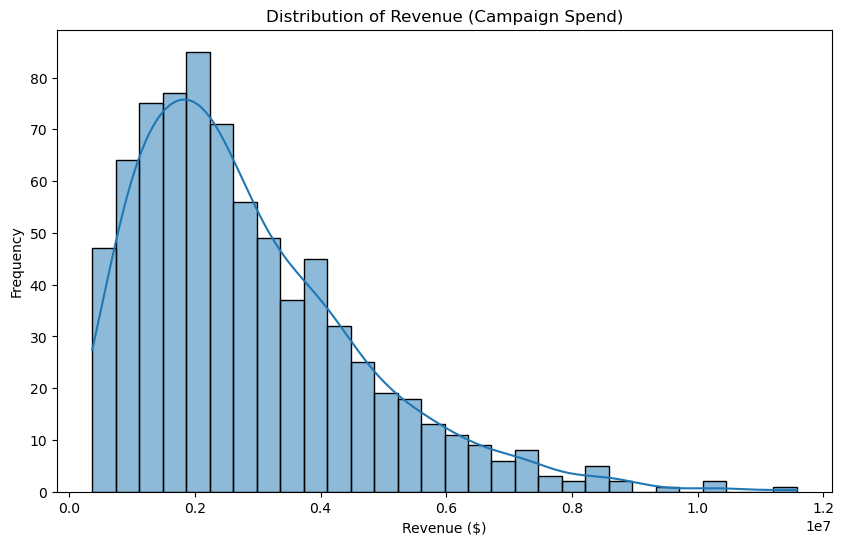

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], kde=True, bins=30)
plt.title('Distribution of Revenue (Campaign Spend)')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()

# Step-2. Identify the top 10% of spenders

In [27]:
# Sort by Revenue in descending order and get the top 10%
top_10_percent_spenders = df.sort_values(by='Revenue', ascending=False).head(int(len(df) * 0.10))


In [28]:
top_10_percent_spenders.head()

,Date,CampaignID,CampaignName,Platform,TargetAudience,Impressions,Clicks,Leads,Applications,Enrollments,Region,Cost,Revenue,EngagementRate
483,2025-02-25,AD003,Placements,LinkedIn,17–21 Age,298028,20642,4696,2781,1630,East India,284889.0,11577296.0,6.926195
573,2025-05-13,AD003,Placements,LinkedIn,22–27 Age,263989,20499,4960,3112,1581,East India,241711.0,10422583.0,7.765096
318,2024-09-13,AD005,Semester Exchange Program,Instagram,25–35 Age,288944,22296,3936,2456,1336,North India,268441.0,10200619.0,7.716374
738,2025-10-07,AD002,MBA Admission,Facebook,21–35 Age,229002,17513,3683,2365,1189,East India,161078.0,9344119.0,7.647531
235,2024-07-23,AD001,UG Admission,Google Ads,17–21 Age,262199,20171,3719,2289,1259,North India,108833.0,8859616.0,7.693012


# Visualization: Box plot of Revenue to show high spenders

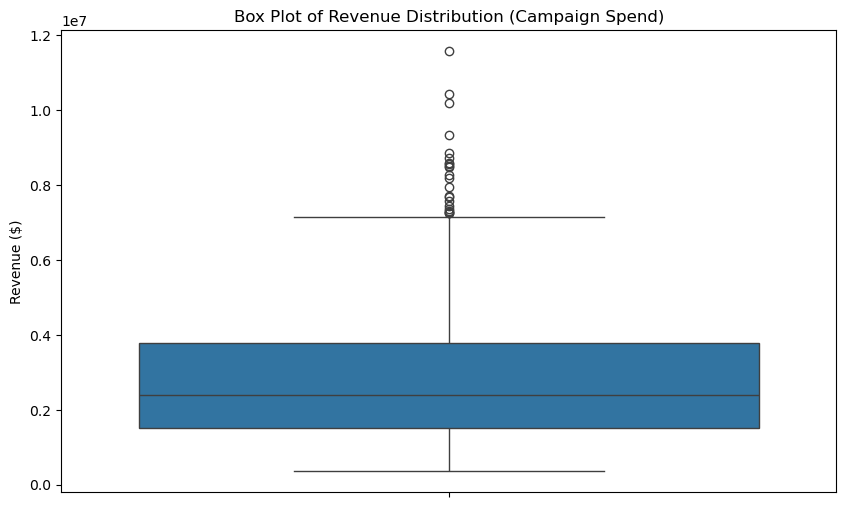

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Revenue'])
plt.title('Box Plot of Revenue Distribution (Campaign Spend)')
plt.ylabel('Revenue ($)')
plt.show()

# Step-3. Detect skewness in customer engagement metrics

In [30]:
# Calculate skewness for Clicks and EngagementRate
clicks_skewness = df['Clicks'].skew()
engagement_rate_skewness = df['EngagementRate'].skew()

In [33]:
clicks_skewness

np.float64(0.7034585833084032)

In [34]:
engagement_rate_skewness

np.float64(-0.006189603209897841)

# Visualization: Histograms to show skewness of Clicks and EngagementRate

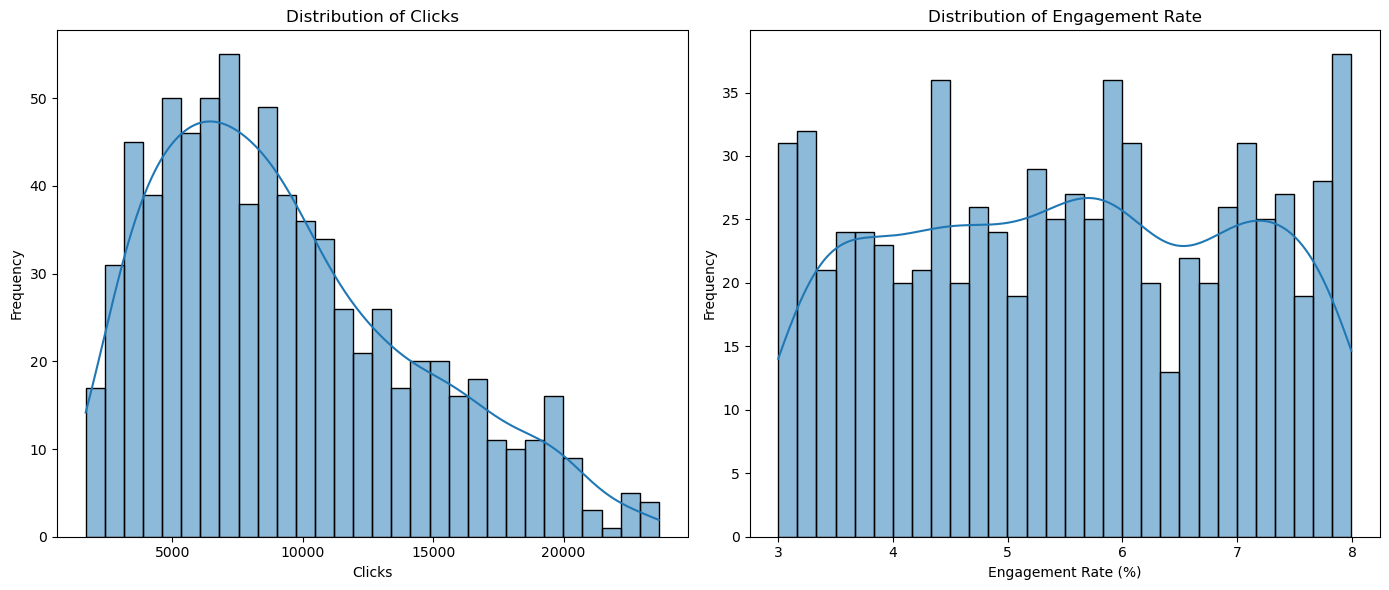

In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Clicks'], kde=True, bins=30)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['EngagementRate'], kde=True, bins=30)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()